In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import sympy as sp 
import math
import cmath

Problem 01- 01

Be it Divergence dynamic pressure or control reversal dynamic pressure, the changes are due to the compressibility corrections of the factor - 
$
    \sqrt{1 - M^2}
$

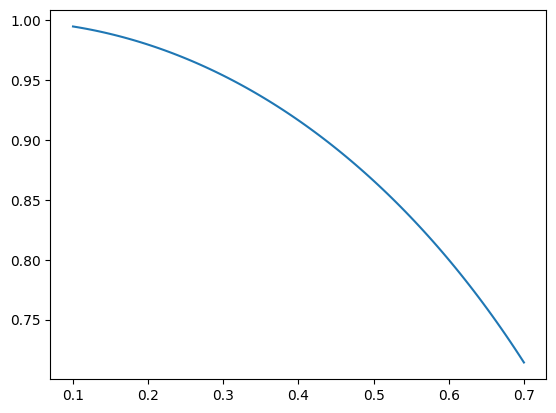

In [2]:
Mach = np.linspace(0.1,0.7,100)
qdiv = np.sqrt(1-Mach**2)

plt.plot(Mach,qdiv)
plt.show()

As such, both the dynamic pressures follow the same trend with varying Mach number.

Problem 01- 02

5 different angles of sweep have been considered to see the variation of control reversal dynamic pressure with respect to increasing Mach number.

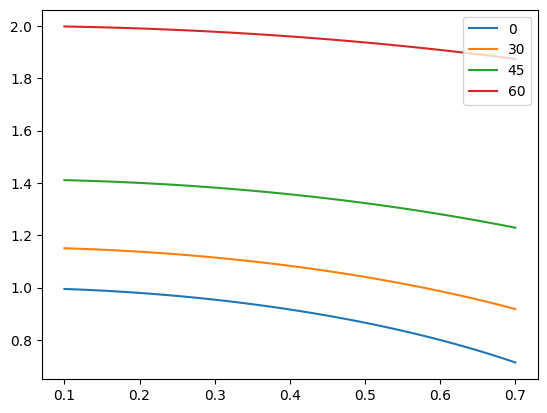

In [3]:
Mach = np.linspace(0.1,0.7,100)
sweep = np.array([0,30,45,60])
for lam in sweep:
    qr = np.sqrt(1-Mach**2*np.cos(lam*np.pi/180)**2)/np.cos(lam*np.pi/180)
    plt.plot(Mach,qr)
plt.legend(sweep)
plt.show()

Problem 03.

In [4]:
m = 3.3843 #kg/m
S_theta = 0.0859 #kg
I_theta = 0.0135 #kg-m
c = 0.254 #m
rho = 1.225 #kg/m^3
b = c/2
K_h = 2818.8 #N/m
K_theta = 37.3 #N
a = -0.5

h0, theta0 = sp.symbols('h0 theta0')
p, t, U = sp.symbols('p t U')

# t = np.linspace(0,20,2000)
h = h0*sp.exp(p*t)
theta = theta0*sp.exp(p*t)

Quasi - Static with no damping

Flutter velocity: 21.131 m/s


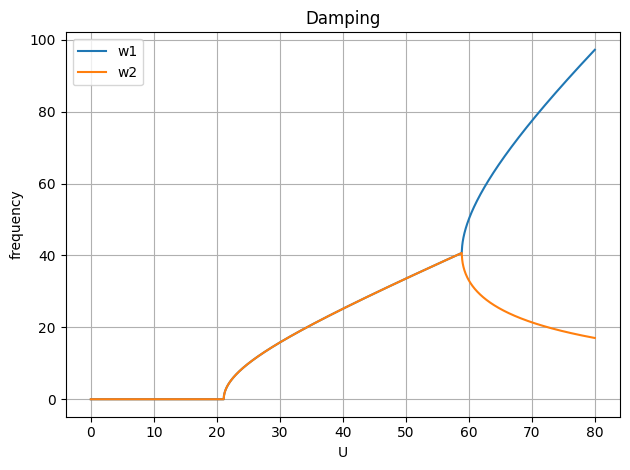

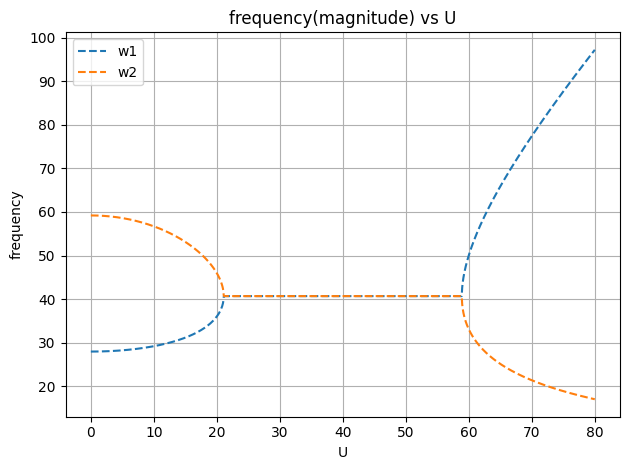

In [5]:
U_values = np.linspace(0,80,2000)
delta = np.zeros((2,len(U_values)), dtype=complex)
ch = 1
for idx, U in enumerate(U_values):
    A = m * I_theta - S_theta**2
    B = (I_theta * K_h + K_theta * m - 2 * np.pi * rho * U**2 * b * (m * b * (a + 0.5) + S_theta))
    C = K_h * K_theta - 2 * np.pi * rho * U**2 * b**2 * (a + 0.5) * K_h

    discriminant = np.lib.scimath.sqrt(B**2 - 4 * A * C)
    root1 = (-B + discriminant) / (2 * A)
    root2 = (-B - discriminant) / (2 * A)

    delta1 = np.lib.scimath.sqrt(root1)
    delta2 = np.lib.scimath.sqrt(root2)

    delta[0, idx] = delta1
    delta[1, idx] = delta2
    if np.sqrt(delta[0,idx].real**2 + delta[0,idx].imag**2)==np.sqrt(delta[1,idx].real**2 + delta[1,idx].imag**2) and ch!=0:
        print("Flutter velocity: {:.3f} m/s".format(U))
        ch = 0

plt.plot(U_values, delta[0].real, label='w1')
plt.plot(U_values, delta[1].real, label='w2')
plt.xlabel('U')
plt.ylabel('frequency')
plt.title('Damping')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# plt.plot(U_values, delta[0].imag, '--', label='Im(delta1)')
# plt.plot(U_values, delta[1].imag, '--', label='Im(delta2)')
# plt.xlabel('U')
# plt.ylabel('Delta')
# plt.title('Delta vs U (Imaginary Parts)')
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()
plt.plot(U_values, np.sqrt(delta[0].real**2 + delta[0].imag**2), '--', label='w1')
plt.plot(U_values, np.sqrt(delta[1].real**2 + delta[1].imag**2), '--', label='w2')
plt.xlabel('U')
plt.ylabel('frequency')
plt.title('frequency(magnitude) vs U')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Quasi-static with damping

Flutter velocity: 0.100 m/s


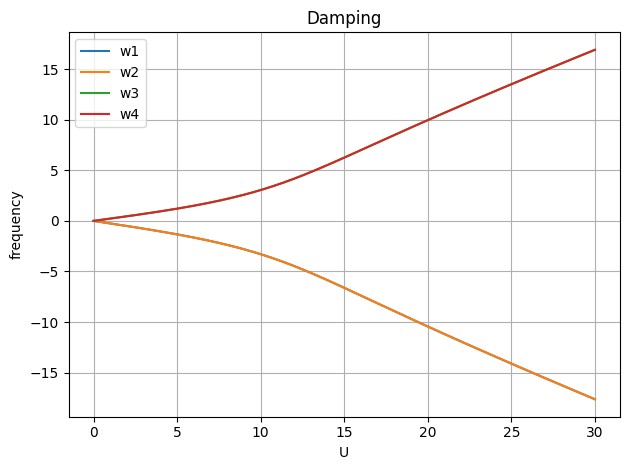

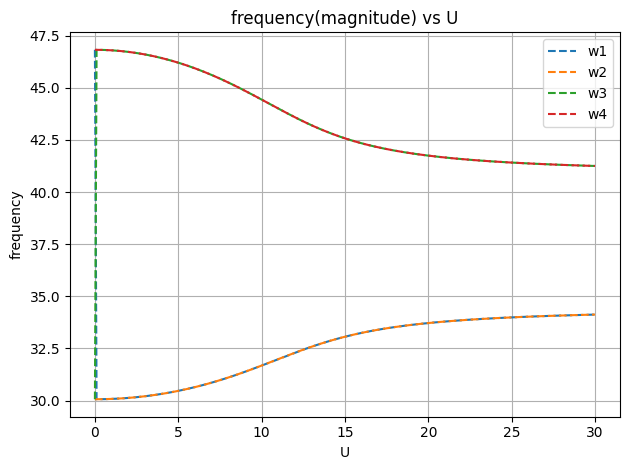

In [9]:
U_values = np.linspace(0,30,300)
delta = np.zeros((4,len(U_values)), dtype=complex)
ch = 1
for idx, U in enumerate(U_values):
    A = m * I_theta + S_theta**2
    B = (I_theta*2*np.pi*rho*U*b - 2*np.pi*rho*U*b**2*(0.5-a)*S_theta)#*1j
    C = (K_theta*m + K_h*I_theta - 2*np.pi*rho*U**2*b*S_theta)
    D = 2*np.pi*rho*U*b*K_theta#*1j
    E = K_h*K_theta
    roots = np.roots([A, B, C, D, E])
    roots_sorted = sorted(roots, key=lambda x: (x.real, x.imag))
    delta[:, idx] = roots_sorted
    if np.sqrt(delta[0,idx].real**2 + delta[0,idx].imag**2)==np.sqrt(delta[1,idx].real**2 + delta[1,idx].imag**2) and ch!=0:
        print("Flutter velocity: {:.3f} m/s".format(U))
        ch = 0
    
plt.plot(U_values, delta[0].real, label='w1')
plt.plot(U_values, delta[1].real, label='w2')
plt.plot(U_values, delta[2].real, label='w3')
plt.plot(U_values, delta[3].real, label='w4')
plt.xlabel('U')
plt.ylabel('frequency')
plt.title('Damping')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# plt.plot(U_values, delta[0].imag, '--', label='Im(delta1)')
# plt.plot(U_values, delta[1].imag, '--', label='Im(delta2)')
# plt.plot(U_values, delta[2].imag, '--', label='Im(delta3)')
# plt.plot(U_values, delta[3].imag, '--', label='Im(delta4)')
# plt.xlabel('U')
# plt.ylabel('Delta')
# plt.title('Delta vs U (Imaginary Parts)')
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()
plt.plot(U_values, np.sqrt(delta[0].real**2 + delta[0].imag**2), '--', label='w1')
plt.plot(U_values, np.sqrt(delta[1].real**2 + delta[1].imag**2), '--', label='w2')
plt.plot(U_values, np.sqrt(delta[2].real**2 + delta[2].imag**2), '--', label='w3')
plt.plot(U_values, np.sqrt(delta[3].real**2 + delta[3].imag**2), '--', label='w4')
plt.xlabel('U')
plt.ylabel('frequency')
plt.title('frequency(magnitude) vs U')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Quasi steady with unsteady flow (c(k) = 1)

Flutter velocity: 18.462 m/s


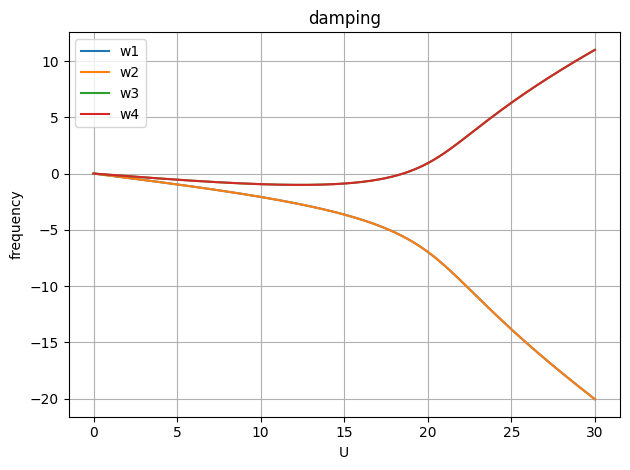

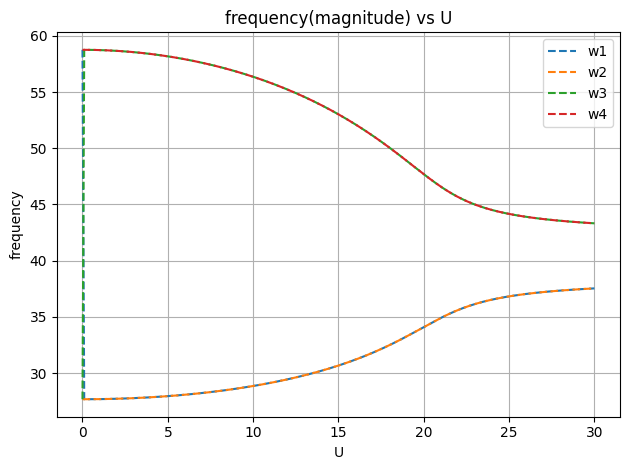

In [8]:
U_values = np.linspace(0,30,300)
delta = np.zeros((4,len(U_values)), dtype=complex)
ch = 1
for idx, U in enumerate(U_values):
    A = (m + np.pi*rho*b**2)*(I_theta + np.pi*rho*b**4*(1/8+a**2)) - (S_theta - np.pi*rho*b**3*a)**2
    B = (I_theta + np.pi*rho*b**4*(1/8+a**2))*2*np.pi*rho*U*b + (m + np.pi*rho*b**2)*(0.5-a)*np.pi*rho*U*b**3 - (2*np.pi*rho*U*b**2*(0.5-a) + np.pi*rho*b**2*U)*(S_theta - np.pi*rho*b**3*a)
    C = K_theta*(m + np.pi*rho*b**2) + K_h*(I_theta + np.pi*rho*b**4*(1/8+a**2)) - 2*np.pi*rho*U**2*b*(S_theta - np.pi*rho*b**3*a) + (0.5-a)*np.pi*rho*U*b**3*2*np.pi*rho*U*b
    D = K_h*(0.5-a)*np.pi*rho*U*b**3 + K_theta*2*np.pi*rho*U*b
    E = K_h*K_theta
    roots = np.roots([A, B, C, D, E])
    roots_sorted = sorted(roots, key=lambda x: (x.real, x.imag))
    delta[:, idx] = roots_sorted

signed = np.where(np.diff(np.sign(delta[3].real))!=0)[0]
print("Flutter velocity: {:.3f} m/s".format(U_values[signed[1]]))

plt.plot(U_values, delta[0].real, label='w1')
plt.plot(U_values, delta[1].real, label='w2')
plt.plot(U_values, delta[2].real, label='w3')
plt.plot(U_values, delta[3].real, label='w4')
plt.xlabel('U')
plt.ylabel('frequency')
plt.title('damping')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
plt.plot(U_values, np.sqrt(delta[0].imag**2 + delta[0].real**2), '--', label='w1')
plt.plot(U_values, np.sqrt(delta[1].imag**2 + delta[1].real**2), '--', label='w2')
plt.plot(U_values, np.sqrt(delta[2].imag**2 + delta[2].real**2), '--', label='w3')
plt.plot(U_values, np.sqrt(delta[3].imag**2 + delta[3].real**2), '--', label='w4')
plt.xlabel('U')
plt.ylabel('frequency')
plt.title('frequency(magnitude) vs U')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()